In [38]:
import time
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio

from PIL import Image
from collections import Counter

## Работа с изображением как с Numpy-массивом

#### Задание 1 -- Загрузить изображение

In [ ]:
# Загрузка изображения двумя способами

# через imageio
with iio.imopen('doggo.jpg', 'r') as image:
    img = image.read()

# через PIL
img1 = Image.open('doggo.jpg')

img1_arr = np.array(img1)

print('Форма изображения через imageio:', img.shape)
print('Форма изображения через PIL:', img1_arr.shape)


Форма изображения через imageio: (900, 675, 3)
Форма изображения через PIL: (900, 675, 3)


In [13]:
img

array([[[171, 124, 106],
        [186, 139, 121],
        [188, 141, 123],
        ...,
        [118, 110,  63],
        [118, 110,  63],
        [118, 110,  63]],

       [[168, 121, 101],
        [182, 135, 115],
        [183, 136, 118],
        ...,
        [118, 110,  63],
        [118, 110,  63],
        [118, 110,  63]],

       [[164, 117,  97],
        [176, 129, 109],
        [175, 128, 108],
        ...,
        [117, 109,  62],
        [117, 109,  62],
        [117, 109,  62]],

       ...,

       [[205, 145, 121],
        [205, 145, 121],
        [205, 145, 119],
        ...,
        [146, 108,  63],
        [146, 108,  63],
        [145, 107,  62]],

       [[205, 145, 121],
        [205, 145, 121],
        [205, 145, 119],
        ...,
        [146, 108,  63],
        [146, 108,  63],
        [145, 107,  62]],

       [[205, 145, 121],
        [205, 145, 121],
        [205, 145, 119],
        ...,
        [146, 108,  63],
        [146, 108,  63],
        [145, 107,  62]]

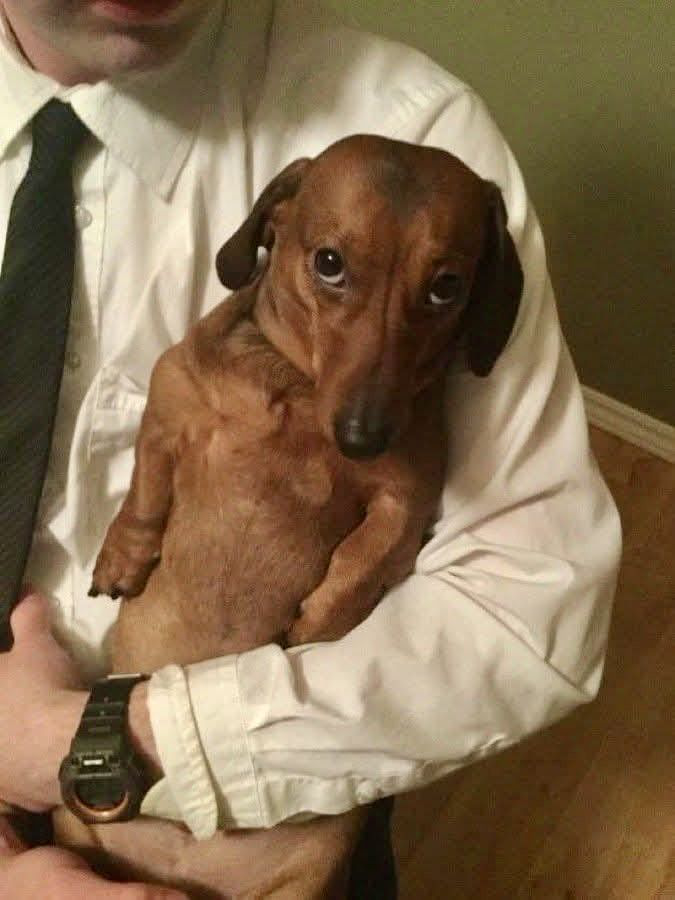

In [12]:
img1

Разница этих двух подходов в том, что метод из библиотеки `imageio.v3` сказу представляет фото как `np.array`, в то время как `PIL` открывает фото и уже на этим фото можно производить любые манипуляции

#### Задание 2 -- Срезы и слои

Покажем как выглядит одно и тоже изображение в трёх разных цветовых каналах (красный, зелёный, синий)

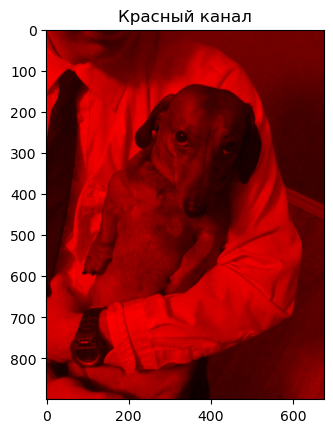

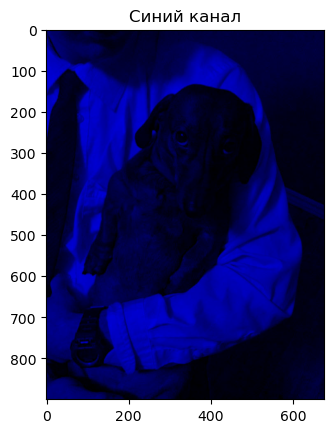

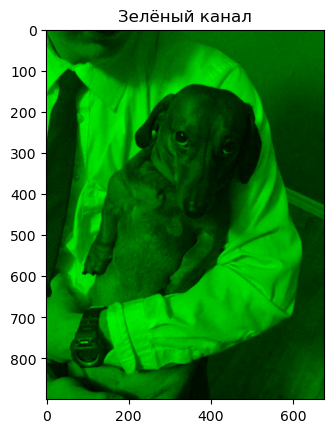

In [18]:
# 0 - R, 1 - G, 2 - B

# красный канал
red_channel = img.copy()
red_channel[:, :, 1] = 0  # убрали зелёный
red_channel[:, :, 2] = 0  # убрали синий
plt.imshow(red_channel)
plt.title("Красный канал")
plt.show()


# cиний канал
blue_channel = img.copy()
blue_channel[:, :, 0] = 0  # убрали красный
blue_channel[:, :, 1] = 0  # убрали зелёный
plt.imshow(blue_channel)
plt.title("Синий канал")
plt.show()

# зелёный канал
green_channel = img.copy()
green_channel[:, :, 0] = 0  # убрали красный
green_channel[:, :, 2] = 0  # убрали синий
plt.imshow(green_channel)
plt.title("Зелёный канал")
plt.show()

#### Задание 3 -- Работа с чёрно-белым изображением

Надо перевести цветное изображение в чёрно-белое по формуле среднего весового

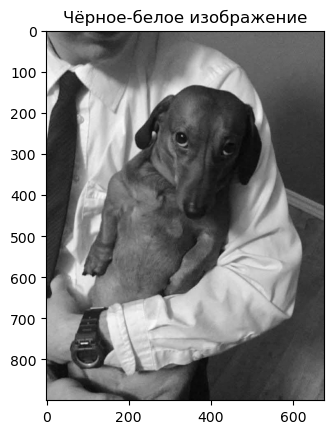

In [ ]:
# среднее весовое
gray = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
gray = gray.astype(np.uint8)
plt.imshow(gray, cmap='gray')
plt.title('Чёрное-белое изображение')
plt.show()

#### Задание 4 -- Уменьшение разрешения изображения

С использованием метода даунсэмплинга

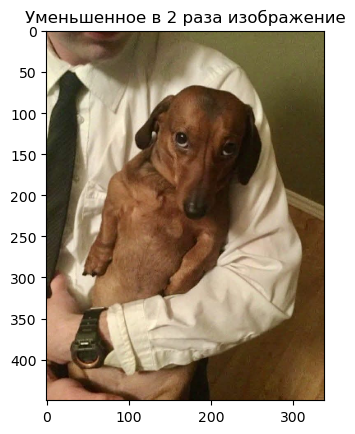

In [20]:
small_img = img[::2, ::2]
plt.imshow(small_img)
plt.title('Уменьшенное в 2 раза изображение')
plt.show()

#### Задание 5 -- Затирание поля на изображении

Заменим мордашку собачки на чёрный прямоугольник

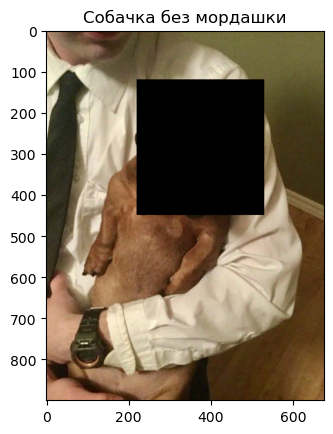

In [ ]:
# 150:450, 200:500
img_black_square = img.copy()
img_black_square[120:450, 220:530] = [0, 0, 0]
plt.imshow(img_black_square)
plt.title('Собачка без мордашки')
plt.show()

#### Задание 6 -- Перевороты изображения

Горизонтальный, вертикальный повороты и поворот на 180 градусов

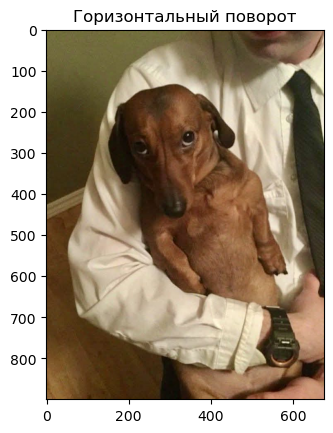

In [25]:
# Горизонтальный поворот
horizontal_flip = img[:, ::-1]
plt.imshow(horizontal_flip)
plt.title('Горизонтальный поворот')
plt.show()

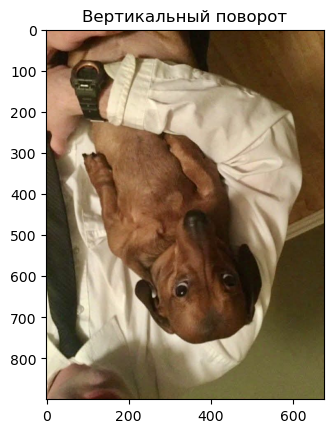

In [26]:
# вертикальный поворот
vertical_flip = img[::-1, :]
plt.imshow(vertical_flip)
plt.title('Вертикальный поворот')
plt.show()

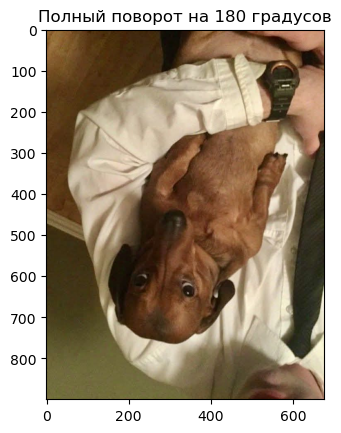

In [27]:
# полный поворот на 180 градусов
flip_180 = np.flip(img, axis=(0, 1))
plt.imshow(flip_180)
plt.title('Полный поворот на 180 градусов')
plt.show()

#### Broadcasting -- наложение фильтра

Фильтры для более "тёплого" и "холодного" изображения, увеличенение конратности и изменение яркоски

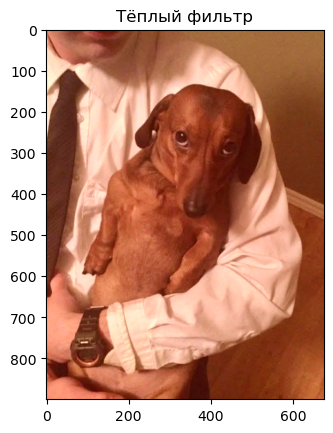

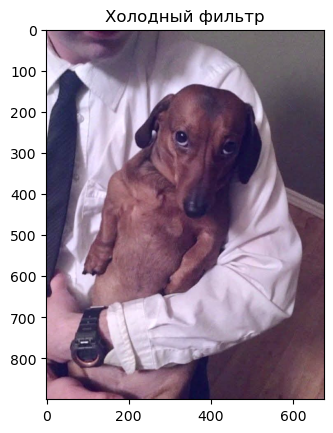

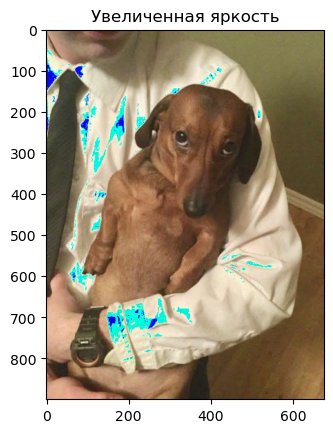

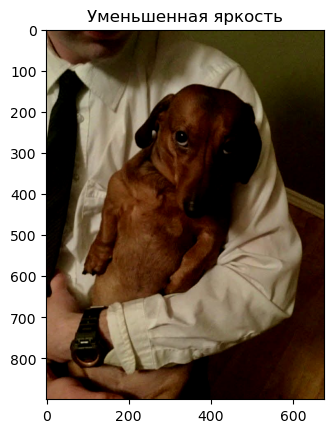

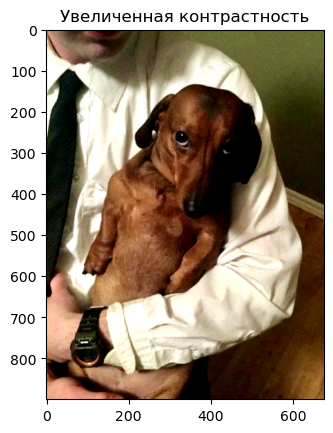

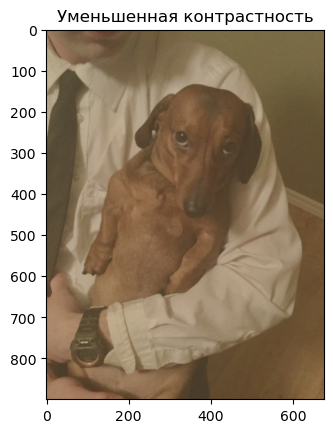

In [31]:
filter_warmer = np.array([50, 0, 0])  # тёплый фильтр
filter_colder = np.array([0, 0, 50])  # холодный фильтр


def change_brightness(image: np.array, brightness_offset: int = 0) -> np.array:
    '''
    Функция изменения яркости изображения
    brightness_offset > 0 - увеличиваем яркость, < 0 - уменьшаем
    '''
    return np.clip(image + brightness_offset, 0, 255).astype(np.uint)


def change_contrast(image: np.array, contrast_factor: float = 1.0) -> np.array:
    '''
    Функция изменения контрастности изображения
    contrast_factor > 1 - увеличиваем контрастность, < 1 - уменьшаем
    '''
    mean = image.mean(axis=(0,1), keepdims=True)
    return np.clip(mean + contrast_factor * (image - mean), 0, 255).astype(np.uint8)


warmer_img = np.clip(img + filter_warmer, 0, 255).astype(np.uint8)
plt.imshow(warmer_img)
plt.title('Тёплый фильтр')
plt.show()

colder_img = np.clip(img + filter_colder, 0, 255).astype(np.uint8)
plt.imshow(colder_img)
plt.title('Холодный фильтр')
plt.show()

more_bright_img = change_brightness(img, 20)
plt.imshow(more_bright_img)
plt.title('Увеличенная яркость')
plt.show()

less_bright_img = change_brightness(img, -50)
plt.imshow(less_bright_img)
plt.title('Уменьшенная яркость')
plt.show()

more_contrast_img = change_contrast(img, 1.5)
plt.imshow(more_contrast_img)
plt.title('Увеличенная контрастность')
plt.show()

less_contrast_img = change_contrast(img, 0.5)
plt.imshow(less_contrast_img)
plt.title('Уменьшенная контрастность')
plt.show()


#### Задание 8 - Транслирование 

Создадим градиентную маску и наложим её на наше фото

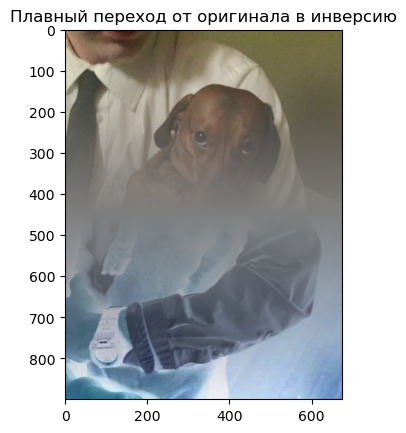

In [36]:
H, W = img.shape[:2]
gradient = np.linspace(0, 1, H)[:, None]  # форма (H, 1)
gradient = gradient[:, :, np.newaxis]  # форма (H, 1, 1)
gradient = np.broadcast_to(gradient, (H, W, 1))  # расширяем до (H, W, 1)

inverted = 255 - img
blended = (img * (1 - gradient) + inverted * gradient).astype(np.uint8)
plt.imshow(blended)
plt.title("Плавный переход от оригинала в инверсию")
plt.show()

## Реализации kNN

Будем сравнивать работу чистого Python и с использованием NumPy

#### Подготовка данных

Сгенерируем выборку из 1000 точек в 3D-пространстве, у нас будет 3 класса (A, B, C) для категоризации

In [39]:
# Подготовка данных
X_train = np.random.rand(1000, 3) * 100  # координаты от 0 до 100
y_train = np.random.choice(['A', 'B', 'C'], size=1000)  # метки классов

X_test = np.array([50.0, 50.0, 50.0])  # точка, которую нужно классифицировать
k = 10  # количество соседей

In [40]:
# реализация на чистом Python
def knn_pure_python(X_train, y_train, X_test, k):
    '''
    X_train: np.array формы (N, features) - обучающие данные
    y_train: np.array формы (N,) - метки классов обучающих данных
    X_test: np.array формы (features,) - тестовая точка
    k: число соседей

    Возвращает: самый частый класс среди k ближайших соседей
    '''
    distances = []

    # Цикл по каждой точке обучающего множества
    for i in range(len(X_train)):
        # Евклидово расстояние до X_test
        dist = np.sqrt(np.sum((X_train[i] - X_test) ** 2))
        distances.append((dist, y_train[i]))

    # Сортируем по расстоянию
    distances.sort(key=lambda x: x[0])

    # Берём k ближайших соседей
    k_nearest = distances[:k]

    # Находим самый частый класс среди соседей
    classes = [label for _, label in k_nearest]
    most_common = Counter(classes).most_common(1)[0][0]

    return most_common

In [42]:
# реализация с NumPy
def knn_numpy(X_train, y_train, X_test, k):
    '''
    X_train: np.array с формой (N, features)
    y_train: np.array с метками (N,)
    X_test: np.array с формой (features,)
    k: число соседей

    Возвращает: самый частый класс среди k ближайших соседей
    '''
    # Расстояния между X_test и каждой точкой X_train (векторно)
    distances = np.linalg.norm(X_train - X_test, axis=1)

    # Индексы сортировки расстояний
    nearest_indices = np.argsort(distances)[:k]

    # Метки k ближайших соседей
    nearest_labels = y_train[nearest_indices]

    # Находим уникальные классы и их количество
    classes, counts = np.unique(nearest_labels, return_counts=True)

    # Класс с максимальным количеством голосов
    winner = classes[np.argmax(counts)]

    return winner


In [50]:
# Сравнение и анализ
def benchmark_knn(X_train, y_train, X_test, k):
    '''
    Функция для сравнения результатов и времени выполнения
    функций knn_pure_python() и knn_numpy()
    '''
    start = time.time()
    result_pure = knn_pure_python(X_train, y_train, X_test, k)
    time_pure = time.time() - start

    start = time.time()
    result_np = knn_numpy(X_train, y_train, X_test, k)
    time_np = time.time() - start

    effiency = round(time_pure / time_np * 100, 2)

    return result_pure, time_pure, result_np, time_np, effiency


sizes = [1000, 10000, 100000]
results = []
ks = [3, 5, 10]

for k in ks:
    for size in sizes:
        X_train = np.random.rand(size, 3) * 100
        y_train = np.random.choice(['A', 'B', 'C'], size=size)

        res_pure, t_pure, res_np, t_np, effiency = benchmark_knn(X_train, y_train, X_test, k)


        results.append({
            'size': size,
            'k': k,
            'knn_pure_result': res_pure,
            'knn_pure_time': t_pure,
            'knn_numpy_result': res_np,
            'knn_numpy_time': t_np,
            'effiency': effiency
        })

for res in results:
    for key, value in res.items():
        print(f'{key}: {value}')
    print()

size: 1000
k: 3
knn_pure_result: B
knn_pure_time: 0.0066680908203125
knn_numpy_result: B
knn_numpy_time: 0.0004298686981201172
effiency: 1551.19

size: 10000
k: 3
knn_pure_result: A
knn_pure_time: 0.06153512001037598
knn_numpy_result: A
knn_numpy_time: 0.0012559890747070312
effiency: 4899.34

size: 100000
k: 3
knn_pure_result: A
knn_pure_time: 0.4773690700531006
knn_numpy_result: A
knn_numpy_time: 0.015764951705932617
effiency: 3028.04

size: 1000
k: 5
knn_pure_result: A
knn_pure_time: 0.004457950592041016
knn_numpy_result: A
knn_numpy_time: 0.00015306472778320312
effiency: 2912.46

size: 10000
k: 5
knn_pure_result: A
knn_pure_time: 0.04514312744140625
knn_numpy_result: A
knn_numpy_time: 0.0012097358703613281
effiency: 3731.65

size: 100000
k: 5
knn_pure_result: A
knn_pure_time: 0.47019314765930176
knn_numpy_result: A
knn_numpy_time: 0.015265703201293945
effiency: 3080.06

size: 1000
k: 10
knn_pure_result: A
knn_pure_time: 0.00458216667175293
knn_numpy_result: A
knn_numpy_time: 0.00016

Размер данных  |  k  |  kNN Pure Python  |  kNN NumPy  |  Эффективность, %  |  Выходы совпадают
---------------|-----|-------------------|-------------|--------------------|-------------------
1000           |  3  |  0.0067           |  0.0004     |  1551.19           |  Да              
10000          |  3  |  0.0615           |  0.0013     |  4899.34           |  Да             
100000         |  3  |  0.4774           |  0.0158     |  3028.04           |  Да              
1000           |  5  |  0.0045           |  0.0002     |  2912.46           |  Да              
10000          |  5  |  0.0451           |  0.0012     |  3731.65           |  Да              
100000         |  5  |  0.4702           |  0.0153     |  3080.06           |  Да              
1000           |  10 |  0.0046           |  0.0002     |  2830.49           |  Да              
10000          |  10 |  0.0858           |  0.0013     |  6726.26           |  Да              
100000         |  10 |  0.4670           |  0.0155     |  3011.16           |  Да              

#### Полученные выводы:

- Версия kNN на чистом Python значительно медленнее реализации с использованием векторных операций NumPy

- Эффективность (ускорение) использования NumPy по времени относительно чистого Python находится в диапазоне от примерно 1500 до 6700 раз быстрее — очень существенное улучшение производительности

- С увеличением размера выборки от 1 000 до 100 000 точек время выполнения растёт у обеих реализаций, однако прирост времени у NumPy гораздо более умеренный

- Зависимость эффективности от числа соседей k незначительна — при разных значениях k=3,5,10 ускорение остаётся на том же уровне, что объясняется тем, что основную долю времени занимает вычисление расстояний и их сортировка, а не подсчёт голосов